# Loan credit classification problem (https://www.kaggle.com/c/titanic)
**The public dataset "German credit data" can be accessed from https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data). It contains data from 1000 customers who had access to a loan: 20 attributes (7 numerical, 13 categorical) describing the customers (ex. highly relevant information such as the purpose of the loan, the amount of savings, the job situation), and the information on whether they were able to repay the debt or not (default). About 300 instances contain customers who defaulted, about 700 instances contain customers who repaid their debt.
The aim is to train a machine learning model to predict with the best possible accuracy which customers will default. We will do this by exloiting various methods such as logistic regression, neural networks and random forests in python scikit-learn library.**
    

**Attributes description:**

Attribute 1: (qualitative)<br>
**Status of existing checking account**<br>
A11 : ... < 0 DM<br>
A12 : 0 <= ... < 200 DM<br>
A13 : ... >= 200 DM / salary assignments for at least 1 year<br>
A14 : no checking account

Attribute 2: (numerical)<br>
**Duration in month**

Attribute 3: (qualitative)<br>
**Credit history**<br>
A30 : no credits taken/ all credits paid back duly<br>
A31 : all credits at this bank paid back duly<br>
A32 : existing credits paid back duly till now<br>
A33 : delay in paying off in the past<br>
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)<br>
**Purpose**<br>
A40 : car (new)<br>
A41 : car (used)<br>
A42 : furniture/equipment<br>
A43 : radio/television<br>
A44 : domestic appliances<br>
A45 : repairs<br>
A46 : education<br>
A47 : (vacation - does not exist?)<br>
A48 : retraining<br>
A49 : business<br>
A410 : others

Attribute 5: (numerical)<br>
**Credit amount**

Attibute 6: (qualitative)<br>
**Savings account/bonds**<br>
A61 : ... < 100 DM<br>
A62 : 100 <= ... < 500 DM<br>
A63 : 500 <= ... < 1000 DM<br>
A64 : .. >= 1000 DM<br>
A65 : unknown/ no savings account

Attribute 7: (qualitative)<br>
**Present employment since**<br>
A71 : unemployed<br>
A72 : ... < 1 year<br>
A73 : 1 <= ... < 4 years<br>
A74 : 4 <= ... < 7 years<br>
A75 : .. >= 7 years

Attribute 8: (numerical)<br>
**Installment rate in percentage of disposable income**

Attribute 9: (qualitative)<br>
**Personal status and sex**<br>
A91 : male : divorced/separated<br>
A92 : female : divorced/separated/married<br>
A93 : male : single<br>
A94 : male : married/widowed<br>
A95 : female : single

Attribute 10: (qualitative)<br>
**Other debtors / guarantors**<br>
A101 : none<br>
A102 : co-applicant<br>
A103 : guarantor

Attribute 11: (numerical)<br>
**Present residence since**

Attribute 12: (qualitative)<br>
**Property**<br>
A121 : real estate<br>
A122 : if not A121 : building society savings agreement/ life insurance<br>
A123 : if not A121/A122 : car or other, not in attribute 6<br>
A124 : unknown / no property

Attribute 13: (numerical)<br>
**Age in years**

Attribute 14: (qualitative)<br>
**Other installment plans**<br>
A141 : bank<br>
A142 : stores<br>
A143 : none

Attribute 15: (qualitative)<br>
**Housing**<br>
A151 : rent<br>
A152 : own<br>
A153 : for free

Attribute 16: (numerical)<br>
**Number of existing credits at this bank**

Attribute 17: (qualitative)<br>
**Job**<br>
A171 : unemployed/ unskilled - non-resident<br>
A172 : unskilled - resident<br>
A173 : skilled employee / official<br>
A174 : management/ self-employed/<br>
highly qualified employee/ officer

Attribute 18: (numerical)<br>
**Number of people being liable to provide maintenance for**

Attribute 19: (qualitative)<br>
**Telephone**<br>
A191 : none<br>
A192 : yes, registered under the customers name

Attribute 20: (qualitative)<br>
**foreign worker**<br>
A201 : yes<br>
A202 : no 

**Import useful modules:**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import RandomForestClassifier

**Set the number of runs for cross-validation, and the number of train and cross-validation examples** 

In [3]:
num_runs = 10

num_train = 800
num_cv = 200
train_file = "credit_german.csv"

**Load dataset into pandas dataframe x:**

In [4]:
x = pd.read_csv(train_file, sep=',')

**Quick inspection of dataframe:**

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
Status_Checking_Acc            1000 non-null object
Duration_in_Months             1000 non-null int64
Credit_History                 1000 non-null object
Purposre_Credit_Taken          1000 non-null object
Credit_Amount                  1000 non-null int64
Savings_Acc                    1000 non-null object
Years_At_Present_Employment    1000 non-null object
Inst_Rt_Income                 1000 non-null int64
Marital_Status_Gender          1000 non-null object
Other_Debtors_Guarantors       1000 non-null object
Current_Address_Yrs            1000 non-null int64
Property                       1000 non-null object
Age                            1000 non-null int64
Other_Inst_Plans               1000 non-null object
Housing                        1000 non-null object
Num_CC                         1000 non-null int64
Job                            1000 non-null object
Dependents      

In [6]:
x.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [7]:
x.describe() # statistical descriptors for every column (only numerical variables)

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment,Count
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.299000,1.0
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458049,0.0
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,1.0
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.0
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,1.0
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.0
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.0


## Feature selection and engineering

**In order to apply machine learning methods for prediction, we need to convert all categorical variables to numerical ones. Morevoer, we need to look at how many examples there are for every category and merge categories that contain few examples, as these would be noisy and would not be a reliable predictor.**

**We look for example at the variable 'Job' using plotting module Seaborn:**

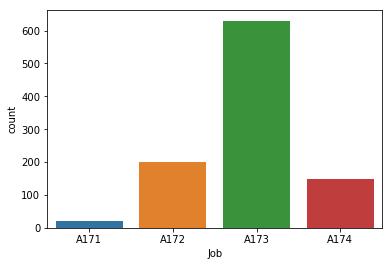

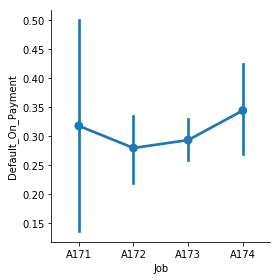

In [8]:
sns.countplot(x='Job',data=x, order=sorted(x['Job'].unique()))
plt.show()

sns.factorplot(x='Job',y='Default_On_Payment',data=x,order=sorted(x['Job'].unique()))
plt.show()

**In this case, we see that the first category (A171 - unemployed/ unskilled - non-resident) contains very few examples. As a result, the average percentage of defaults calculated for this category is affected by a very large uncertainty. Therefore, we decide to merge it with category A172 - unskilled - resident). In addition, we assign an integer to each distinct category so as to transform this into a numerical variable:**

In [9]:
x.loc[x['Job']=='A171','Job'] = 'A172'
x['Job'] = x['Job'].astype('category')
x['Job'] = x['Job'].cat.codes

In [10]:
x['Job'].head()

0    1
1    1
2    0
3    1
4    1
Name: Job, dtype: int8

**We now repeat this procedure for every categorical variable, and merge categories whenever needed:**

In [11]:
x.loc[x['Status_Checking_Acc']=='A13','Status_Checking_Acc'] = 'A14'
x['Status_Checking_Acc'] = x['Status_Checking_Acc'].astype('category')
x['Status_Checking_Acc'] = x['Status_Checking_Acc'].cat.codes

x.loc[x['Credit_History']=='A31','Credit_History'] = 'A30'
x['Credit_History'] = x['Credit_History'].astype('category')
x['Credit_History'] = x['Credit_History'].cat.codes

x.loc[x['Purposre_Credit_Taken']=='A48','Purposre_Credit_Taken'] = 'A41'
x.loc[x['Purposre_Credit_Taken']=='A44','Purposre_Credit_Taken'] = 'A46'
x.loc[x['Purposre_Credit_Taken']=='A45','Purposre_Credit_Taken'] = 'A46'
x.loc[x['Purposre_Credit_Taken']=='A410','Purposre_Credit_Taken'] = 'A46'
x['Purposre_Credit_Taken'] = x['Purposre_Credit_Taken'].astype('category')
x['Purposre_Credit_Taken'] = x['Purposre_Credit_Taken'].cat.codes

x.loc[x['Savings_Acc']=='A64','Savings_Acc'] = 'A63'
x['Savings_Acc'] = x['Savings_Acc'].astype('category')
x['Savings_Acc'] = x['Savings_Acc'].cat.codes

x.loc[x['Years_At_Present_Employment']=='A71','Years_At_Present_Employment'] = 'A72'
x['Years_At_Present_Employment'] = x['Years_At_Present_Employment'].astype('category')
x['Years_At_Present_Employment'] = x['Years_At_Present_Employment'].cat.codes

x['Marital_Status_Gender'] = x['Marital_Status_Gender'].astype('category')
x['Marital_Status_Gender'] = x['Marital_Status_Gender'].cat.codes

x['Other_Debtors_Guarantors'] = x['Other_Debtors_Guarantors'].astype('category')
x['Other_Debtors_Guarantors'] = x['Other_Debtors_Guarantors'].cat.codes

x['Property'] = x['Property'].astype('category')
x['Property'] = x['Property'].cat.codes

x['Other_Inst_Plans'] = x['Other_Inst_Plans'].astype('category')
x['Other_Inst_Plans'] = x['Other_Inst_Plans'].cat.codes

x['Housing'] = x['Housing'].astype('category')
x['Housing'] = x['Housing'].cat.codes

x['Telephone'] = x['Telephone'].astype('category') # looks like a not very useful feature
x['Telephone'] = x['Telephone'].cat.codes

x['Foreign_Worker'] = x['Foreign_Worker'].astype('category')
x['Foreign_Worker'] = x['Foreign_Worker'].cat.codes

**Numerical variables also need inspection, to check whether some pre-processing is needed. For example, let us consider the 'Duration_in_Months' variable:**

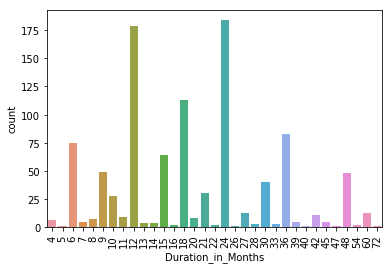

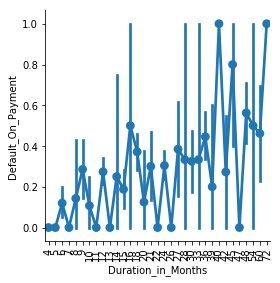

In [12]:
sns.countplot(x='Duration_in_Months',data=x, order=sorted(x['Duration_in_Months'].unique()))
plt.xticks(rotation=90)
plt.show()

sns.factorplot(x='Duration_in_Months',y='Default_On_Payment',data=x,order=sorted(x['Duration_in_Months'].unique()))
plt.xticks(rotation=90)
plt.show()

**It looks very noisy, as some of the values for 'Duration_in_Months' contain very few examples. Therefore, it is better to group the values into larger bins, as using the raw data could lead to model overfitting. Using 5 years bins seem like a reasonable choice:**

In [13]:
x.loc[x['Duration_in_Months']>50, 'Duration_in_Months'] = 50 # as very few cases above 50 months

labels = [ "{0} - {1}".format("%02d" % i, "%02d" % (i + 4)) for i in range(0, 55, 5) ]
x['Duration_in_Months'] = pd.cut(x['Duration_in_Months'], range(0, 60, 5), right=False, labels=labels)

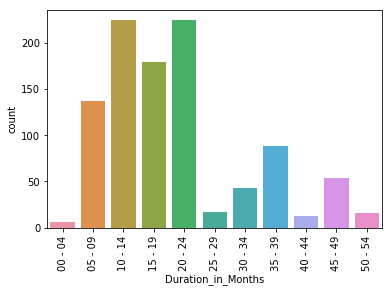

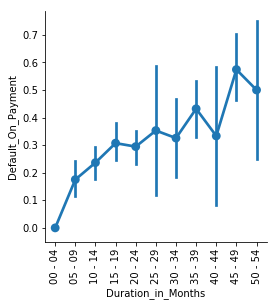

In [14]:
sns.countplot(x='Duration_in_Months',data=x, order=sorted(x['Duration_in_Months'].unique()))
plt.xticks(rotation=90)
plt.show()

sns.factorplot(x='Duration_in_Months',y='Default_On_Payment',data=x,order=sorted(x['Duration_in_Months'].unique()))
plt.xticks(rotation=90)
plt.show()

**Now we see that the variable is much less noisy, and we can actually see a clear trend for the target variable 'Default' as a function of the duration of the loan. We can now re-transform the variable from categorical to numerical:**

In [15]:
x['Duration_in_Months'] = x['Duration_in_Months'].cat.codes

**We can process in a similar way also the other numerical variables:**

In [16]:
x.loc[x['Age']>69, 'Age'] = 69 # as very few cases above 70 years old
x.loc[x['Age']<20, 'Age'] = 20 # as very few cases below 20 years old

labels = [ "{0} - {1}".format("%02d" % i, "%02d" % (i + 4)) for i in range(0, 80, 5) ]
x['Age'] = pd.cut(x['Age'], range(0, 85, 5), right=False, labels=labels)
x['Age'] = x['Age'].cat.codes

x.loc[x['Num_CC']==4, 'Num_CC'] = 3 # as very few cases above 70 years old

x.loc[x['Credit_Amount']>10000, 'Credit_Amount'] = 10500 # as very few cases above amount of 1000
labels = [ "{0} - {1}".format("%02d" % i, "%02d" % (i + 4)) for i in range(0, 11000, 1000) ]
x['Credit_Amount'] = pd.cut(x['Credit_Amount'], range(0, 12000, 1000), right=False, labels=labels)
x['Credit_Amount'] = x['Credit_Amount'].cat.codes


**We want to confirm that the variables are all numerical now before using models for prediction:**

In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
Status_Checking_Acc            1000 non-null int8
Duration_in_Months             1000 non-null int8
Credit_History                 1000 non-null int8
Purposre_Credit_Taken          1000 non-null int8
Credit_Amount                  1000 non-null int8
Savings_Acc                    1000 non-null int8
Years_At_Present_Employment    1000 non-null int8
Inst_Rt_Income                 1000 non-null int64
Marital_Status_Gender          1000 non-null int8
Other_Debtors_Guarantors       1000 non-null int8
Current_Address_Yrs            1000 non-null int64
Property                       1000 non-null int8
Age                            1000 non-null int8
Other_Inst_Plans               1000 non-null int8
Housing                        1000 non-null int8
Num_CC                         1000 non-null int64
Job                            1000 non-null int8
Dependents                     1000 non-n

**We inspect the dependence of the Default target variable upon the various predictors, to have a look if all predictors can eb useful:**

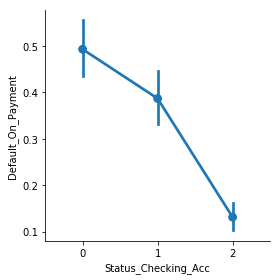

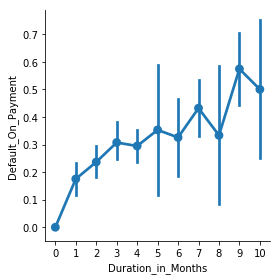

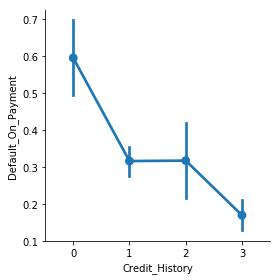

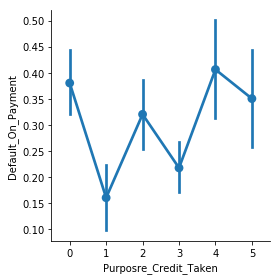

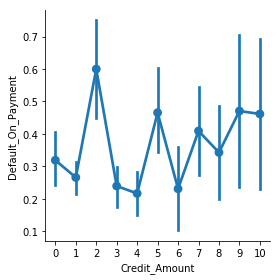

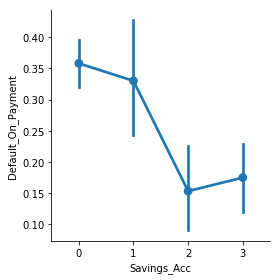

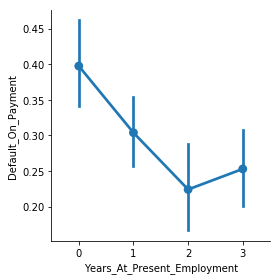

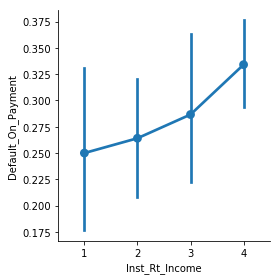

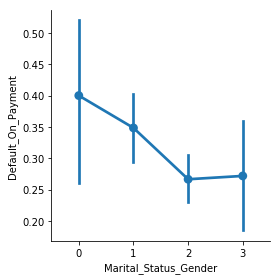

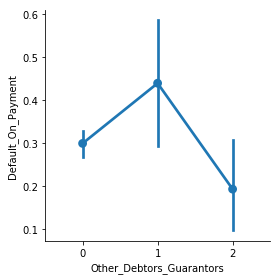

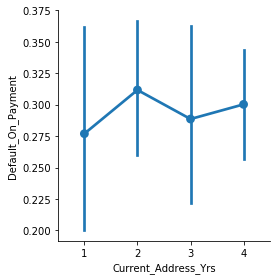

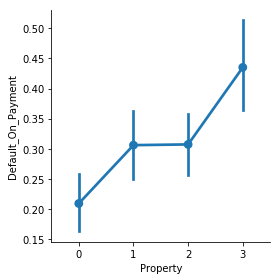

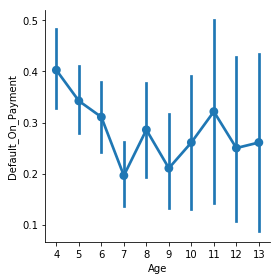

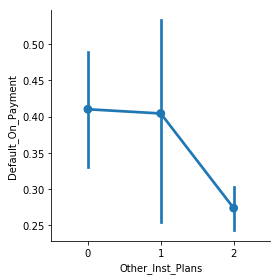

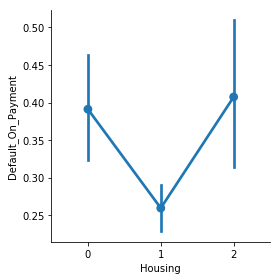

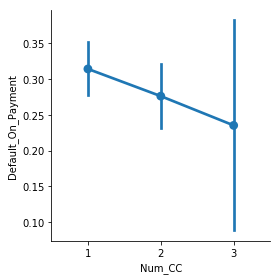

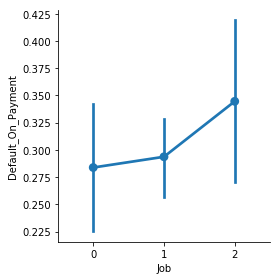

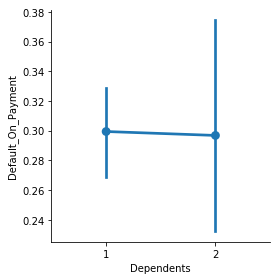

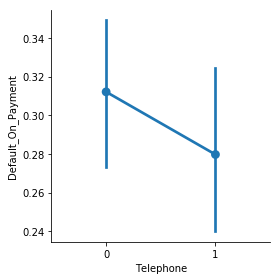

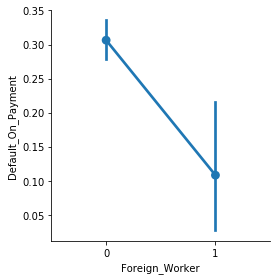

In [18]:
sns.factorplot(x='Status_Checking_Acc',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Duration_in_Months',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Credit_History',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Purposre_Credit_Taken',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Credit_Amount',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Savings_Acc',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Years_At_Present_Employment',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Inst_Rt_Income',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Marital_Status_Gender',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Other_Debtors_Guarantors',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Current_Address_Yrs',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Property',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Age',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Other_Inst_Plans',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Housing',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Num_CC',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Job',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Dependents',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Telephone',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Foreign_Worker',y='Default_On_Payment',data=x)
plt.show()

**It does not make much sense that the Default probability would depend on whether there is a telephone registered under the customer's name, or on the number of years in the current address. The plots above confirm this: these two quantities look like very poor predictors, and we can then drop them. The quantity 'Dependents' (number of people being liable to provide maintenance for) also does not show any correlation with the 'Default' variable, so we drop it:

In [19]:
del x['Current_Address_Yrs']
del x['Dependents']
del x['Telephone']

 **Now we are ready to train our model. We create new series y for target variable "Default_On_Payment", eliminate useless variable "Count" from x, and transform x and y to numpy arrays:**

In [20]:
y = x['Default_On_Payment']
del x['Default_On_Payment']
del x['Count']

x = np.array(x)
y = np.array(y)

## Prediction using various machine learning methods

### Logistic regression

**We start by testing the simplest method, logistic regression, using python scikit-learn library.<br>
We randomly split the whole dataset into a train set and a cross-validation set. The first is used to train the model in predicting default, the second is used to check the accuracy of the model on unseen examples. What we want to optimize is the accuracy on the cross-validation set, this is what quantifies how well the model performs in predicting default.<br>
The splitting procedure and the model training is repeated a certain number of times (10, in this case), and the resulting accuracies are averaged. This reduces the uncertainty on our estimate of the model accuracy.<br>
Something to keep in mind is that the dataset is unbalanced (only 299 instances represent a default, compared to 701 with customers being able to repay their debt). For this reason, at every run of the algorithm, we remove a fraction of the non-default cases, in order to rebalance the dataset. Otherwise, non-default cases would be effectively weighted more than default cases, and the model would be biased in accuracy towards the first.**

In [20]:
num_runs = 10

# initialization of accuracies
train_accuracy_log = np.zeros(num_runs)
cv_accuracy_log = np.zeros(num_runs)


for kk in range(num_runs):    
        
    ## select randomly training and cross validation datasets
    x_tr, x_cv, y_tr, y_cv = train_test_split(x, y, test_size=num_cv/(num_train+num_cv), random_state=None)
    
    # remove a fraction (43%) of the non-default cases, to rebalance the dataset
    rem_vec_tr = (y_tr-1) * (np.random.rand(len(y_tr)) > 0.57) # vector indicating which instances to remove
    x_tr = x_tr[rem_vec_tr==0]
    y_tr = y_tr[rem_vec_tr==0]
    rem_vec_cv = (y_cv-1) * (np.random.rand(len(y_cv)) > 0.57)
    x_cv = x_cv[rem_vec_cv==0]
    y_cv = y_cv[rem_vec_cv==0]
    
    # normalize independent variables to mean = 0 and std = 1    
    xtrNorm = np.zeros(x_tr.shape)
    for k in range(x_tr.shape[1]):
        xtrNorm[:,k] = (x_tr[:,k] - np.mean(x_tr[:,k])) / np.std(x_tr[:,k])
    
    xcvNorm = np.zeros(x_cv.shape)
    for k in range(x_cv.shape[1]): 
        xcvNorm[:,k] = (x_cv[:,k] - np.mean(x_tr[:,k])) / np.std(x_tr[:,k])
            
    x_cv = xcvNorm
    x_tr = xtrNorm     

    y_tr = np.squeeze(y_tr)
    y_cv = np.squeeze(y_cv)
    
    
    ##########################################
    ## Logistic regression using only linear features
    ##########################################
    
    clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1,
                             fit_intercept=True, intercept_scaling=100, class_weight=None,
                             random_state=None, solver='liblinear', max_iter=100,
                             multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
    clf.fit(x_tr, y_tr)
    
    pred_tr = clf.predict(x_tr)
    pred_cv = clf.predict(x_cv)
    
    # Compute accuracy on training set
    train_accuracy_log[kk] = np.mean(pred_tr == y_tr) * 100
    
    # Compute accuracy on cross-validation set
    cv_accuracy_log[kk] = np.mean(pred_cv == y_cv) * 100


# display mean accuracies and their standard deviations for logistic regression
print("\nAverage train accuracy for logistic regression: %f" % np.mean(train_accuracy_log))
print("with standard deviation of the mean: %f\n" % (np.std(train_accuracy_log) / np.sqrt(num_runs)))
print("Average cross validation accuracy for logistic regression: %f" % np.mean(cv_accuracy_log))
print("with standard deviation of the mean: %f\n" % (np.std(cv_accuracy_log) / np.sqrt(num_runs)))


Average train accuracy for logistic regression: 74.282104
with standard deviation of the mean: 0.418318

Average cross validation accuracy for logistic regression: 73.788796
with standard deviation of the mean: 1.220417



**We see that the model accuracy is already good (about 73%) even with just a simple model such as logistic regression.** 

### Neural networks: grid search for hyper-parameters tuning

**We now turn our attention to neural networks, and to the challenge of optimizing their hyper-parameters, in particular the number of internal layers, the number of nodes per layer and the regularization parameter. We will use the function MLPClassifier from sklearn.neural_network.<br>
The aim is to find the combination of parameters providing best accuracy for the cross-validation set. Increasing the number of layers and nodes makes the neural network able to model more complex functions, but also more prone to overfitting. Regularization can be very useful to reduce this overfitting, so a careful trade-off between these parameters is needed to achieve optimal accuracy.<br>
We start by fixing the number of internal layers to 1, and we optimize regularization parameter and number of nodes. In order to do this, we follow the same strategy used above for logistic regression.<br>
However, here the model is run for every combination of regularization parameter and number of nodes, and the accuracy recorded. The average accuracies for every combination of regularization parameter and number of nodes is then displayed in an image, in order to determine the best value for these hyper-parameters.**

In [32]:
# Neural network with only one internal layer

num_runs = 100

# Hyper-parameters for neural network tuning (grid search)
alpha_vec = [1,3,5,7,10,14,18,22,26,30,36,40,45,50,55,60] # regularization parameter
size_vec = [3,4,5,6,8,10,13,15,18,20,22,25,27,30] # number of nodes in the two internal layers

# Initialization of accuracies
train_accuracy = np.zeros( (len(alpha_vec), len(size_vec), num_runs) )
cv_accuracy = np.zeros( (len(alpha_vec), len(size_vec), num_runs) )


for kk in range(num_runs):    
        
    ## select randomly training and cross validation datasets
    x_tr, x_cv, y_tr, y_cv = train_test_split(x, y, test_size=num_cv/(num_train+num_cv), random_state=None)
    
    # remove a fraction (43%) of the non-default cases, to rebalance the dataset
    rem_vec_tr = (y_tr-1) * (np.random.rand(len(y_tr)) > 0.57) # vector indicating which instances to remove
    x_tr = x_tr[rem_vec_tr==0]
    y_tr = y_tr[rem_vec_tr==0]
    rem_vec_cv = (y_cv-1) * (np.random.rand(len(y_cv)) > 0.57)
    x_cv = x_cv[rem_vec_cv==0]
    y_cv = y_cv[rem_vec_cv==0]
    
    # normalize independent variables to mean = 0 and std = 1    
    xtrNorm = np.zeros(x_tr.shape)
    for k in range(x_tr.shape[1]):
        xtrNorm[:,k] = (x_tr[:,k] - np.mean(x_tr[:,k])) / np.std(x_tr[:,k])
    
    xcvNorm = np.zeros(x_cv.shape)
    for k in range(x_cv.shape[1]): 
        xcvNorm[:,k] = (x_cv[:,k] - np.mean(x_tr[:,k])) / np.std(x_tr[:,k])
      
    x_cv = xcvNorm
    x_tr = xtrNorm     

    y_tr = np.squeeze(y_tr)
    y_cv = np.squeeze(y_cv)
    
    
    ##########################################
    ## Neural network
    ##########################################
    

    for aa in range(len(alpha_vec)):
        for ss in range(len(size_vec)):
            
            clf = MLPClassifier(solver='lbfgs', alpha=alpha_vec[aa], hidden_layer_sizes=(size_vec[ss]), random_state=1)
            clf.fit(x_tr, y_tr)
            
            pred_tr = clf.predict(x_tr)
            pred_cv = clf.predict(x_cv)
            
            # Compute accuracy on training set
            train_accuracy[aa, ss, kk] = np.mean(pred_tr == y_tr) * 100
            
            # Compute accuracy on cross-validation set
            cv_accuracy[aa, ss, kk] = np.mean(pred_cv == y_cv) * 100
       

accuracy_map_train = np.mean(train_accuracy, axis=2)
accuracy_map_cv = np.mean(cv_accuracy, axis=2)
std_map_train = np.std(train_accuracy, axis=2)
std_map_cv = np.std(cv_accuracy, axis=2)

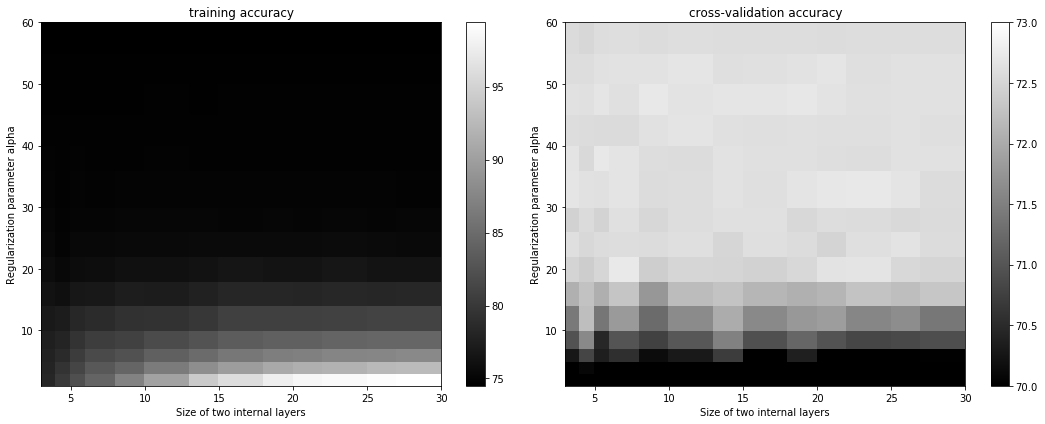

In [34]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.pcolor(size_vec,alpha_vec,accuracy_map_train, cmap='gray')
plt.xlabel('Size of two internal layers')
plt.ylabel('Regularization parameter alpha')
plt.colorbar()
plt.title('training accuracy')

plt.subplot(1,2,2)
plt.pcolor(size_vec,alpha_vec,accuracy_map_cv, cmap='gray', vmin=70, vmax=73.0)
plt.xlabel('Size of two internal layers')
plt.ylabel('Regularization parameter alpha')
plt.colorbar()
plt.title('cross-validation accuracy')

plt.tight_layout()
plt.show()

**A careful look at the accuracies of training and cross-validation sets shows the following. In the first case (left image), the best accuracy is achieved with higher number of nodes in the internal layer and small regularization parameter (accuracy higher than 95%). However, the corresponding values for the cross-validation set show that this results in a strong overfitting of the model, as the accuracy for the cross-validation set is quite poor (note the different color scale used for the two images). Our model depends strongly on the training data and on their associated "noise", and is not general anymore. The best accuracy is instead obtained for larger values of regularization. We choose the values 20 and 30 for the number of nodes and regularization parameter.<br>
We can note, though, that we did not gain in accuracy compared to that provided by logistic regression.**

**After having examined the case of 1 internal layer, we want to see if adding one extra layer can improve our accuracy. As before, we will look at a combination of different values for the regularization parameter and the number of nodes in the internal layers.**

In [38]:
# Neural network with 2 internal layers

num_runs = 100

# Hyper-parameters for neural network tuning (grid search)
alpha_vec = [1,3,5,7,10,14,18,22,26,30,36,40,45,50,55,60] # regularization parameter
size_vec = [3,4,5,6,8,10,13,15,18,20,22,25,27,30] # number of nodes in the two internal layers

# Initialization of accuracies
train_accuracy = np.zeros( (len(alpha_vec), len(size_vec), num_runs) )
cv_accuracy = np.zeros( (len(alpha_vec), len(size_vec), num_runs) )


for kk in range(num_runs):    
        
    ## select randomly training and cross validation datasets
    x_tr, x_cv, y_tr, y_cv = train_test_split(x, y, test_size=num_cv/(num_train+num_cv), random_state=None)
    
    # remove a fraction (43%) of the non-default cases, to rebalance the dataset
    rem_vec_tr = (y_tr-1) * (np.random.rand(len(y_tr)) > 0.57) # vector indicating which instances to remove
    x_tr = x_tr[rem_vec_tr==0]
    y_tr = y_tr[rem_vec_tr==0]
    rem_vec_cv = (y_cv-1) * (np.random.rand(len(y_cv)) > 0.57)
    x_cv = x_cv[rem_vec_cv==0]
    y_cv = y_cv[rem_vec_cv==0]
    
    # normalize independent variables to mean = 0 and std = 1    
    xtrNorm = np.zeros(x_tr.shape)
    for k in range(x_tr.shape[1]):
        xtrNorm[:,k] = (x_tr[:,k] - np.mean(x_tr[:,k])) / np.std(x_tr[:,k])
    
    xcvNorm = np.zeros(x_cv.shape)
    for k in range(x_cv.shape[1]): 
        xcvNorm[:,k] = (x_cv[:,k] - np.mean(x_tr[:,k])) / np.std(x_tr[:,k])
      
    x_cv = xcvNorm
    x_tr = xtrNorm     

    y_tr = np.squeeze(y_tr)
    y_cv = np.squeeze(y_cv)
    
    
    ##########################################
    ## Neural network
    ##########################################
    

    for aa in range(len(alpha_vec)):
        for ss in range(len(size_vec)):
            
            clf = MLPClassifier(solver='lbfgs', alpha=alpha_vec[aa], hidden_layer_sizes=(size_vec[ss],size_vec[ss]), random_state=1)
            clf.fit(x_tr, y_tr)
            
            pred_tr = clf.predict(x_tr)
            pred_cv = clf.predict(x_cv)
            
            # Compute accuracy on training set
            train_accuracy[aa, ss, kk] = np.mean(pred_tr == y_tr) * 100
            
            # Compute accuracy on cross-validation set
            cv_accuracy[aa, ss, kk] = np.mean(pred_cv == y_cv) * 100
       

accuracy_map_train = np.mean(train_accuracy, axis=2)
accuracy_map_cv = np.mean(cv_accuracy, axis=2)
std_map_train = np.std(train_accuracy, axis=2)
std_map_cv = np.std(cv_accuracy, axis=2)

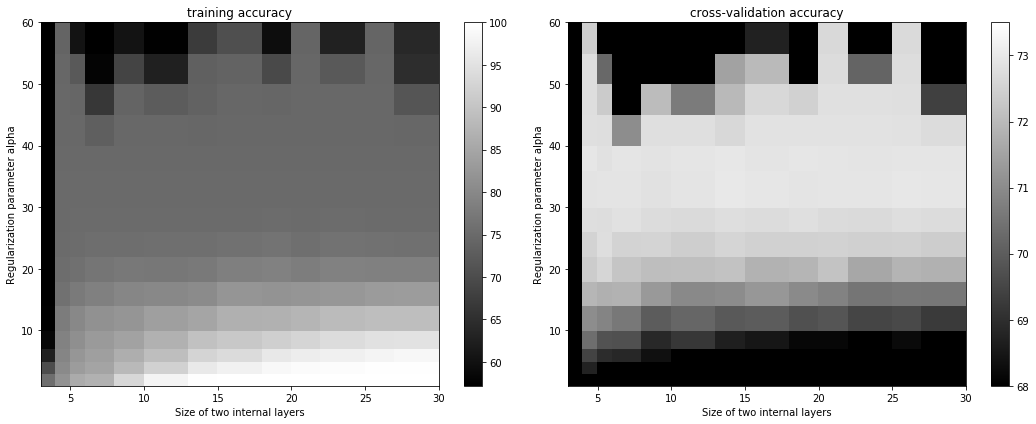

In [41]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.pcolor(size_vec,alpha_vec,accuracy_map_train, cmap='gray')
plt.xlabel('Size of two internal layers')
plt.ylabel('Regularization parameter alpha')
plt.colorbar()
plt.title('training accuracy')

plt.subplot(1,2,2)
plt.pcolor(size_vec,alpha_vec,accuracy_map_cv, cmap='gray', vmin=68, vmax=73.5)
plt.xlabel('Size of two internal layers')
plt.ylabel('Regularization parameter alpha')
plt.colorbar()
plt.title('cross-validation accuracy')

plt.tight_layout()
plt.show()

**As we saw before, a large number of nodes and small regularization lead to overfitting. The optimal values of the regularization parameter for best accuracy lie in the range 30-40, while the influence of the number of nodes is less obvious. We can choose optimal values of 20 and 30 for number of nodes and regularization parameter, respectively. We note that, compared to the case of 1 internal layer only, the accuracy has not been substantially improved (the slight improvement we can see lies within the statistical uncertainty).**

### Random forests: grid search for hyper-parameters tuning

**We now consider the optimization of the random forests model, and check whether it provides a means to improve the prediction accuracy for our problem.<br>
In this case, we set the number of trees to 100, and try a combination of different values for min_samples_leaf (the minimum number of samples required to be at a leaf node) and max_depth (the maximum depth of each tree in the forest). The model is more prone to overfitting with smaller values of min_samples_leaf and larger values of max_depth, and more prone to underfitting in the opposite case. Therefore, the best parameters leading to the optimal trade-off need to be identified.**

In [25]:
num_runs = 100

# Hyper-parameters for random forest tuning (grid search)
leaf_vec = [1,2,3,4,5,6,7,8,9,10]
depth_vec = [2,3,4,6,8,10,12,14,16,18,20]

# Initialization of accuracies
train_accuracy = np.zeros( (len(leaf_vec), len(depth_vec), num_runs) )
cv_accuracy = np.zeros( (len(leaf_vec), len(depth_vec), num_runs) )


for kk in range(num_runs):    
        
    ## select randomly training and cross validation datasets
    x_tr, x_cv, y_tr, y_cv = train_test_split(x, y, test_size=num_cv/(num_train+num_cv), random_state=None)
    
    # remove a fraction (43%) of the non-default cases, to rebalance the dataset
    rem_vec_tr = (y_tr-1) * (np.random.rand(len(y_tr)) > 0.57) # vector indicating which instances to remove
    x_tr = x_tr[rem_vec_tr==0]
    y_tr = y_tr[rem_vec_tr==0]
    rem_vec_cv = (y_cv-1) * (np.random.rand(len(y_cv)) > 0.57)
    x_cv = x_cv[rem_vec_cv==0]
    y_cv = y_cv[rem_vec_cv==0]
    
    # normalize independent variables to mean = 0 and std = 1    
    xtrNorm = np.zeros(x_tr.shape)
    for k in range(x_tr.shape[1]):
        xtrNorm[:,k] = (x_tr[:,k] - np.mean(x_tr[:,k])) / np.std(x_tr[:,k])
    
    xcvNorm = np.zeros(x_cv.shape)
    for k in range(x_cv.shape[1]): 
        xcvNorm[:,k] = (x_cv[:,k] - np.mean(x_tr[:,k])) / np.std(x_tr[:,k])
      
    x_cv = xcvNorm
    x_tr = xtrNorm     

    y_tr = np.squeeze(y_tr)
    y_cv = np.squeeze(y_cv)
    
    
    ##########################################
    ## Random forest
    ##########################################
    
    
    for ll in range(len(leaf_vec)):
        for dd in range(len(depth_vec)):
            
            clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=depth_vec[dd], min_samples_split=10,
                           min_samples_leaf=leaf_vec[ll], min_weight_fraction_leaf=0.0, max_features='auto',
                           max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None,
                           verbose=0, warm_start=False, class_weight=None)
            
            clf.fit(x_tr, y_tr)
    
            pred_tr = clf.predict(x_tr)
            pred_cv = clf.predict(x_cv)
    
            # Compute accuracy on training set
            train_accuracy[ll, dd, kk] = np.mean(pred_tr == y_tr) * 100
    
            # Compute accuracy on cross-validation set
            cv_accuracy[ll, dd, kk] = np.mean(pred_cv == y_cv) * 100

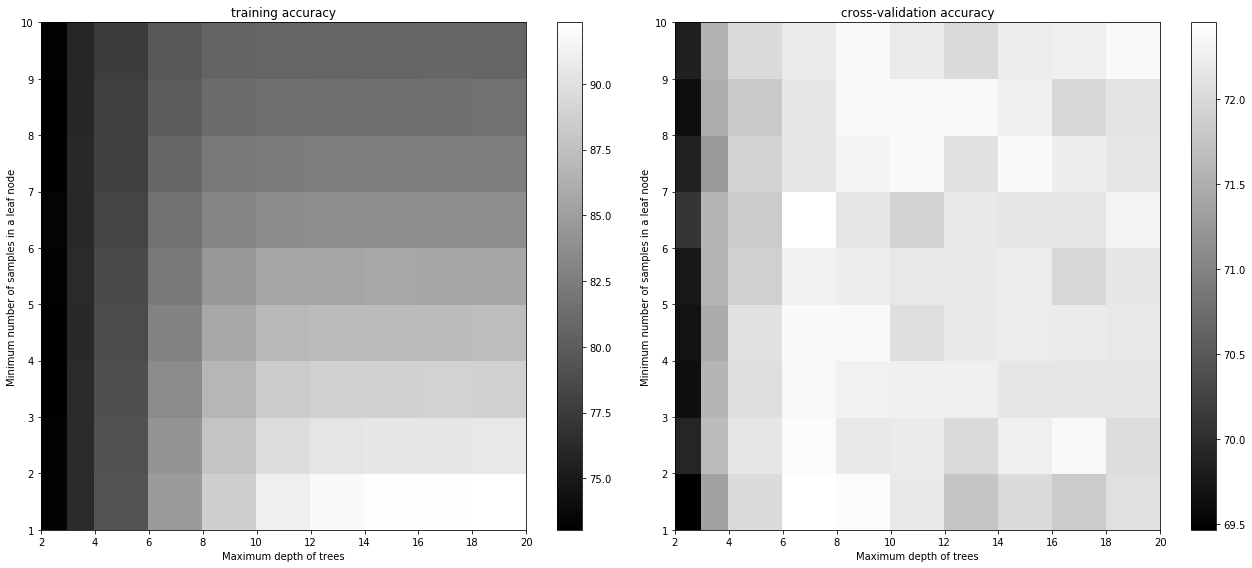

In [26]:
accuracy_map_train = np.mean(train_accuracy, axis=2)
accuracy_map_cv = np.mean(cv_accuracy, axis=2)
std_map_train = np.std(train_accuracy, axis=2)
std_map_cv = np.std(cv_accuracy, axis=2)

plt.figure(figsize=(18, 8))
plt.subplot(1,2,1)
plt.pcolor(depth_vec,leaf_vec,accuracy_map_train, cmap='gray')
plt.xlabel('Maximum depth of trees')
plt.ylabel('Minimum number of samples in a leaf node')
plt.colorbar()
plt.title('training accuracy')

plt.subplot(1,2,2)
plt.pcolor(depth_vec,leaf_vec,accuracy_map_cv, cmap='gray')
plt.xlabel('Maximum depth of trees')
plt.ylabel('Minimum number of samples in a leaf node')
plt.colorbar()
plt.title('cross-validation accuracy')

plt.tight_layout()
plt.show()

**As expected, a small value for max_depth leads to underfitting, while a high value in combination with a low value of min_samples_leaf leads to overfitting. The accuracy for the cross-validation set looks quite noisy, as a result of the fact that the accuracies are very similar for different parameter combinations.<br>
Values of 10 and 5 for max_depth and min_samples_leaf look like reasonable choices. **

### Putting everything back together:

**Having determined the best hyper-parameters for the neural networks and random forest models, we now want to compare the three machine learning methods (the two above plus logistic regression) using the same train and cross-validation sets:**

In [27]:
num_runs = 100

# initialization of accuracies
train_accuracy_log = np.zeros(num_runs)
cv_accuracy_log = np.zeros(num_runs)

train_accuracy_neur = np.zeros(num_runs)
cv_accuracy_neur = np.zeros(num_runs)

train_accuracy_randfor = np.zeros(num_runs)
cv_accuracy_randfor = np.zeros(num_runs)


for kk in range(num_runs):    
        
    ## select randomly training and cross validation datasets
    x_tr, x_cv, y_tr, y_cv = train_test_split(x, y, test_size=num_cv/(num_train+num_cv), random_state=None)
    
    # remove a fraction (43%) of the non-default cases, to rebalance the dataset
    rem_vec_tr = (y_tr-1) * (np.random.rand(len(y_tr)) > 0.57) # vector indicating which instances to remove
    x_tr = x_tr[rem_vec_tr==0]
    y_tr = y_tr[rem_vec_tr==0]
    rem_vec_cv = (y_cv-1) * (np.random.rand(len(y_cv)) > 0.57)
    x_cv = x_cv[rem_vec_cv==0]
    y_cv = y_cv[rem_vec_cv==0]
    
    # normalize independent variables to mean = 0 and std = 1    
    xtrNorm = np.zeros(x_tr.shape)
    for k in range(x_tr.shape[1]):
        xtrNorm[:,k] = (x_tr[:,k] - np.mean(x_tr[:,k])) / np.std(x_tr[:,k])
    
    xcvNorm = np.zeros(x_cv.shape)
    for k in range(x_cv.shape[1]): 
        xcvNorm[:,k] = (x_cv[:,k] - np.mean(x_tr[:,k])) / np.std(x_tr[:,k])
            
    x_cv = xcvNorm
    x_tr = xtrNorm     

    y_tr = np.squeeze(y_tr)
    y_cv = np.squeeze(y_cv)
    
    
    ##########################################
    ## Logistic regression using only linear features
    ##########################################
    
    clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1,
                             fit_intercept=True, intercept_scaling=100, class_weight=None,
                             random_state=None, solver='liblinear', max_iter=100,
                             multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
    clf.fit(x_tr, y_tr)
    
    pred_tr = clf.predict(x_tr)
    pred_cv = clf.predict(x_cv)
    
    # Compute accuracy on training set
    train_accuracy_log[kk] = np.mean(pred_tr == y_tr) * 100
    
    # Compute accuracy on cross-validation set
    cv_accuracy_log[kk] = np.mean(pred_cv == y_cv) * 100

    
    ##########################################
    ## Neural network
    ##########################################
    
    clf = MLPClassifier(solver='lbfgs', alpha=30, hidden_layer_sizes=(20,20), random_state=1)
   
    clf.fit(x_tr, y_tr)
    
    pred_tr = clf.predict(x_tr)
    pred_cv = clf.predict(x_cv)
    
    # Compute accuracy on training set
    train_accuracy_neur[kk] = np.mean(pred_tr == y_tr) * 100
    
    # Compute accuracy on cross-validation set
    cv_accuracy_neur[kk] = np.mean(pred_cv == y_cv) * 100
       
    
    ##########################################
    ## Random forest
    ##########################################
    
    clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, min_samples_split=10,
                           min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features='auto',
                           max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None,
                           verbose=0, warm_start=False, class_weight=None)
    clf.fit(x_tr, y_tr)
    
    pred_tr = clf.predict(x_tr)
    pred_cv = clf.predict(x_cv)
    
    # Compute accuracy on training set
    train_accuracy_randfor[kk] = np.mean(pred_tr == y_tr) * 100
    
    # Compute accuracy on cross-validation set
    cv_accuracy_randfor[kk] = np.mean(pred_cv == y_cv) * 100
        
        

# display mean accuracies and their standard deviations for logistic regression
print("\nAverage train accuracy for logistic regression: %f" % np.mean(train_accuracy_log))
print("with standard deviation of the mean: %f\n" % (np.std(train_accuracy_log) / np.sqrt(num_runs)))
print("Average cross validation accuracy for logistic regression: %f" % np.mean(cv_accuracy_log))
print("with standard deviation of the mean: %f\n" % (np.std(cv_accuracy_log) / np.sqrt(num_runs)))

# display mean accuracies and their standard deviations for neural network
print("\nAverage train accuracy for neural network: %f" % np.mean(train_accuracy_neur))
print("with standard deviation of the mean: %f\n" % (np.std(train_accuracy_neur) / np.sqrt(num_runs)))
print("Average cross validation accuracy for neural network: %f" % np.mean(cv_accuracy_neur))
print("with standard deviation of the mean: %f\n" % (np.std(cv_accuracy_neur) / np.sqrt(num_runs)))

# display mean accuracies and their standard deviations for random forests
print("\nAverage train accuracy for random forests: %f" % np.mean(train_accuracy_randfor))
print("with standard deviation of the mean: %f\n" % (np.std(train_accuracy_randfor) / np.sqrt(num_runs)))
print("Average cross validation accuracy for random forests: %f" % np.mean(cv_accuracy_randfor))
print("with standard deviation of the mean: %f\n" % (np.std(cv_accuracy_randfor) / np.sqrt(num_runs)))


Average train accuracy for logistic regression: 74.574722
with standard deviation of the mean: 0.132654

Average cross validation accuracy for logistic regression: 72.187762
with standard deviation of the mean: 0.370575


Average train accuracy for neural network: 74.860414
with standard deviation of the mean: 0.125162

Average cross validation accuracy for neural network: 72.499754
with standard deviation of the mean: 0.334477


Average train accuracy for random forests: 85.352038
with standard deviation of the mean: 0.089382

Average cross validation accuracy for random forests: 71.925046
with standard deviation of the mean: 0.364335



**Based on the results obtained here for the accuracy of the three different models, we can conclude that there is no statistical evidence that neural networks or random forests perform better that logistic regression on this dataset. This somewhat surprising result is probably due to two main reasons:<br>
1) The two classes (default or non-default) are to a good extent linearly separable. Adding a more complex model (or, in other terms, a more complex hyper-surface separating the two classes) does not improve the accuracy. Any potential benefit deriving from a more complex model is counterbalanced by the regularization that needs to be applied to avoid overfitting.<br>
2) Linked to the previous point is the fact that the number of examples in the dataset is limited (1000, and even smaller after downsampling to rebalance it), therefore it is intrinsically difficult to separate structure from noise. Large values for the regularization parameter cannot be avoided.
**